In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score,
    classification_report, confusion_matrix
)

In [ ]:
df = pd.read_csv("heart.csv")

print("\n✅ Dataset Info:")
print(df.info())
print("\n Missing values:", df.isnull().sum().sum())


✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

 Missing values: 0


/tmp/ipython-input-990324562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


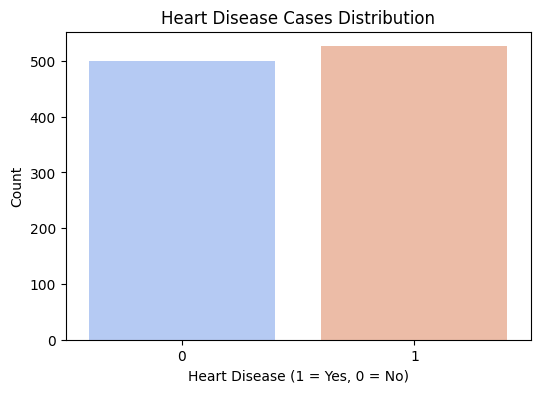

In [ ]:
# Distribution of heart disease cases
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Heart Disease Cases Distribution")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

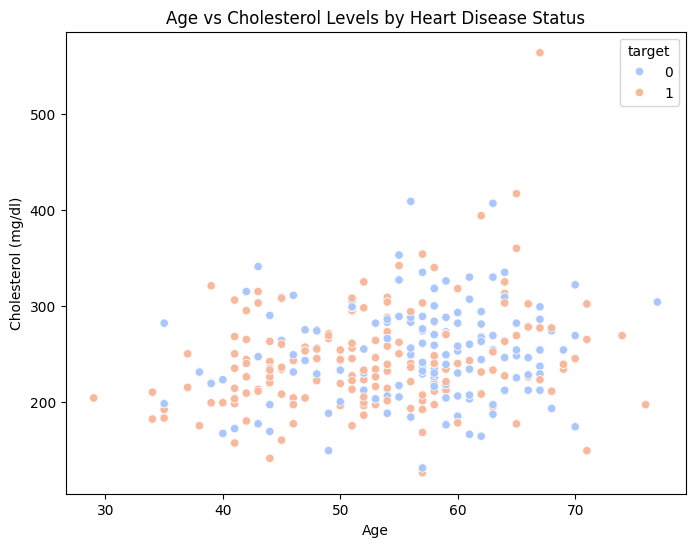

In [ ]:
# Age vs Cholesterol
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='chol', hue='target', data=df, palette='coolwarm')
plt.title("Age vs Cholesterol Levels by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()


/tmp/ipython-input-1310044185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='Set2')


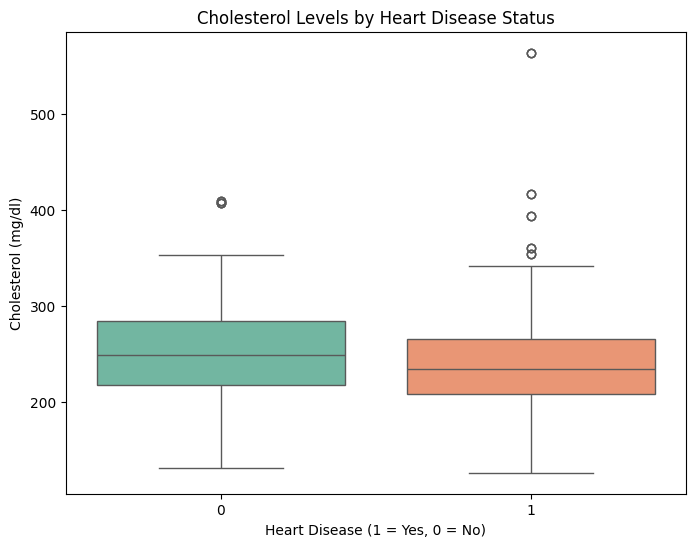

In [ ]:
# Cholesterol Levels by Heart Disease Status
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='chol', data=df, palette='Set2')
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()


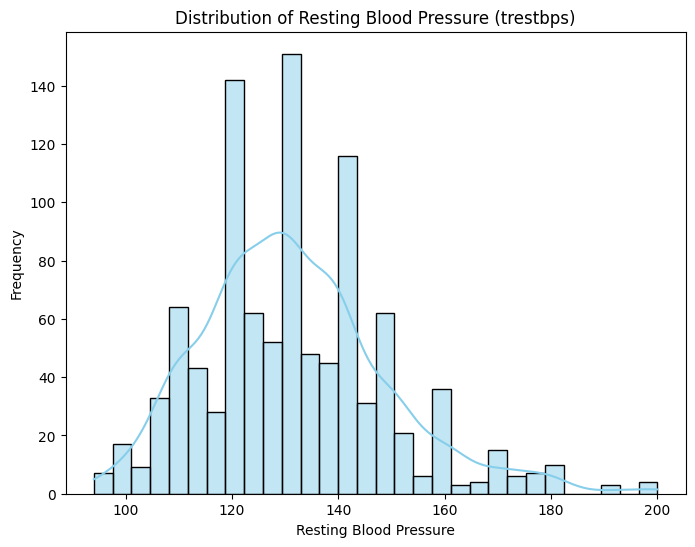

In [ ]:
# Histogram of resting blood pressure
plt.figure(figsize=(8,6))
sns.histplot(df['trestbps'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Resting Blood Pressure (trestbps)")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency")
plt.show()

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []



In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

results.append([
    "Logistic Regression",
    accuracy_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr)
])

print("\n✅ Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))


✅ Logistic Regression Report
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)  # tree does not require scaling
y_pred_dt = dt.predict(X_test)

results.append([
    "Decision Tree",
    accuracy_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_dt)
])

print("\n✅ Decision Tree Report")
print(classification_report(y_test, y_pred_dt))



✅ Decision Tree Report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



In [ ]:
best_acc = 0
best_k = None
best_knn = None
best_preds = None

for k in [ 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)

    print(f"K={k} -> Test Accuracy: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_k = k
        best_knn = knn
        best_preds = preds

results.append([
    f"KNN (best k={best_k})",
    accuracy_score(y_test, best_preds),
    f1_score(y_test, best_preds),
    recall_score(y_test, best_preds),
    precision_score(y_test, best_preds)
])

print(f"\n✅ Best KNN is k={best_k} with accuracy {best_acc:.4f}")
print(classification_report(y_test, best_preds))


K=3 -> Test Accuracy: 0.9463
K=5 -> Test Accuracy: 0.8634
K=7 -> Test Accuracy: 0.8439
K=9 -> Test Accuracy: 0.8537

✅ Best KNN is k=3 with accuracy 0.9463
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       100
           1       0.94      0.96      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



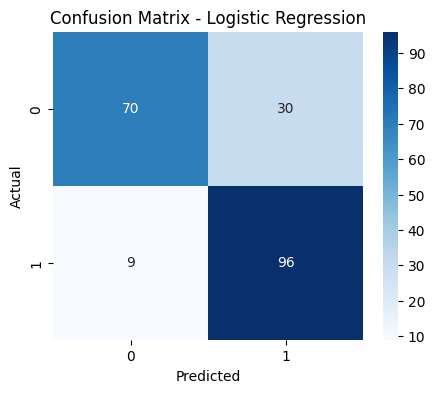

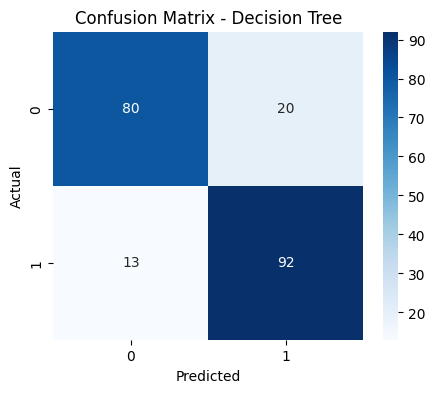

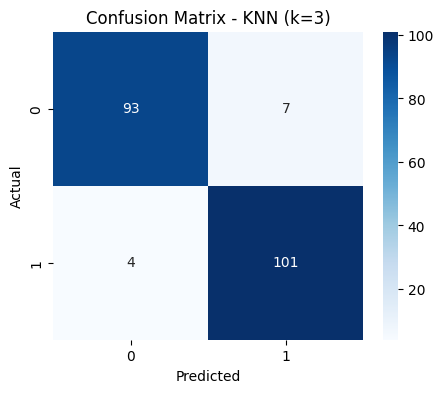

In [ ]:
models_preds = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    f"KNN (k={best_k})": best_preds
}

for model_name, preds in models_preds.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



📊 Model Comparison (Best KNN + Others):
                  Model  Accuracy  F1 Score    Recall  Precision
2       KNN (best k=3)  0.946341  0.948357  0.961905   0.935185
1        Decision Tree  0.839024  0.847926  0.876190   0.821429
0  Logistic Regression  0.809756  0.831169  0.914286   0.761905


/tmp/ipython-input-1512779230.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=summary, palette='viridis')


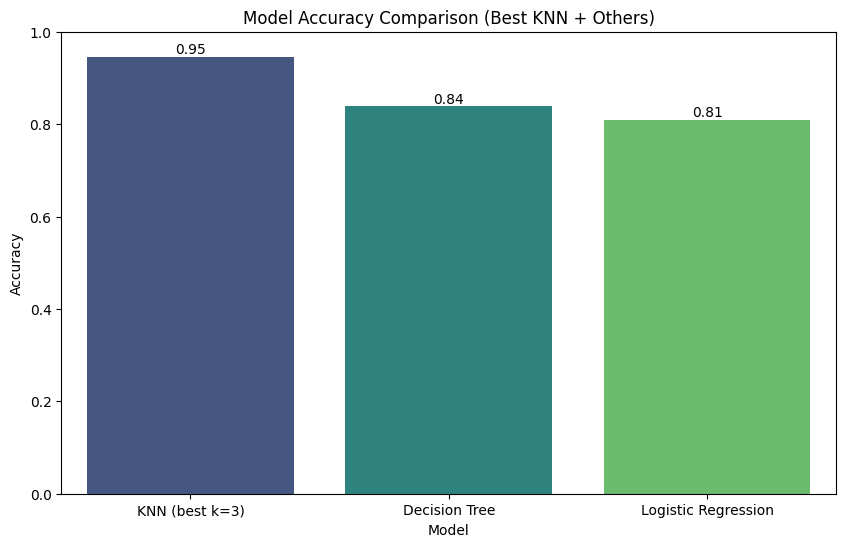

In [ ]:
# ====================== MODEL COMPARISON (BEST KNN + OTHERS) ======================

# keep only Logistic Regression, Decision Tree, and best KNN
filtered_results = [res for res in results if res[0] in ["Logistic Regression", "Decision Tree"]]

# add best KNN
filtered_results.append((
    f"KNN (best k={best_k})",
    accuracy_score(y_test, best_preds),
    f1_score(y_test, best_preds),
    recall_score(y_test, best_preds),
    precision_score(y_test, best_preds)
))

# create summary dataframe
summary = pd.DataFrame(filtered_results, columns=["Model", "Accuracy", "F1 Score", "Recall", "Precision"])
summary = summary.sort_values(by="Accuracy", ascending=False)

print("\n📊 Model Comparison (Best KNN + Others):\n", summary)

# plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=summary, palette='viridis')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Model Accuracy Comparison (Best KNN + Others)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()


In [ ]:
# Example: Patient with no heart disease
no_hd_patient = {
    "age": 35, "sex": 1, "cp": 0, "trestbps": 120, "chol": 180,
    "fbs": 0, "restecg": 0, "thalach": 170, "exang": 0,
    "oldpeak": 0.0, "slope": 2, "ca": 0, "thal": 2
}

# Example: Patient with heart disease
hd_patient = {
    "age": 65, "sex": 1, "cp": 3, "trestbps": 150, "chol": 300,
    "fbs": 1, "restecg": 1, "thalach": 120, "exang": 1,
    "oldpeak": 2.5, "slope": 0, "ca": 2, "thal": 3
}

# Put patients in DataFrame
test_patients = pd.DataFrame([no_hd_patient, hd_patient])

# Scale features
test_patients_scaled = scaler.transform(test_patients)

# Predict
probs = knn.predict_proba(test_patients_scaled)
preds = knn.predict(test_patients_scaled)

# Print results with readable confidence
for i, (pred, prob) in enumerate(zip(preds, probs)):
    status = "Heart Disease" if pred == 1 else "No Heart Disease"
    confidence = prob[pred] * 100  # probability of predicted class
    print(f"Patient {i+1}: {status} ({confidence:.1f}% confidence)")


Patient 1: Heart Disease (66.7% confidence)
Patient 2: No Heart Disease (66.7% confidence)


In [ ]:
# Colab Cell 1: save artifacts
from joblib import dump
# ensure variables best_knn and scaler exist (from your training cells)
dump(best_knn, "model_knn.joblib")
dump(scaler, "scaler.joblib")
print("Saved model_knn.joblib and scaler.joblib")


Saved model_knn.joblib and scaler.joblib


In [ ]:
# Colab Cell 2: optionally zip artifacts and dataset for easy download
import zipfile
files_to_zip = ["model_knn.joblib", "scaler.joblib"]
# include heart.csv from your session if present
try:
    open("heart.csv")
    files_to_zip.append("heart.csv")
except Exception:
    pass

with zipfile.ZipFile("heart_streamlit_package.zip", "w") as z:
    for f in files_to_zip:
        z.write(f)
print("Created heart_streamlit_package.zip with:", files_to_zip)


Created heart_streamlit_package.zip with: ['model_knn.joblib', 'scaler.joblib', 'heart.csv']


In [ ]:
# Colab Cell 3: download files to local machine
from google.colab import files
# prefer the zip if you made it
import os
if os.path.exists("heart_streamlit_package.zip"):
    files.download("heart_streamlit_package.zip")
else:
    # fall back to individual files
    if os.path.exists("model_knn.joblib"):
        files.download("model_knn.joblib")
    if os.path.exists("scaler.joblib"):
        files.download("scaler.joblib")
    if os.path.exists("heart.csv"):
        files.download("heart.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>